In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



In [6]:
df = pd.read_csv("C:\\Users\\mamta\\Downloads\\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0, 0.5, 'Frequency')

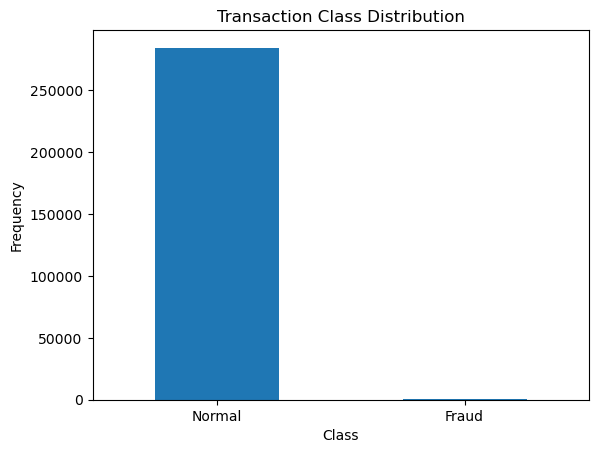

In [12]:
count_classes = pd.value_counts(df['Class'], sort=True)
count_classes.plot(kind = 'bar', rot=0)
plt.title('Transaction Class Distribution')
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Frequency')

In [13]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [14]:
#This data is highly unbalanced
# 0 >> Normal Transactions
# 1 >> Fraud Transactions


In [15]:
normal = df[df.Class == 0]
fraud = df[df.Class == 1]

In [16]:
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [17]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

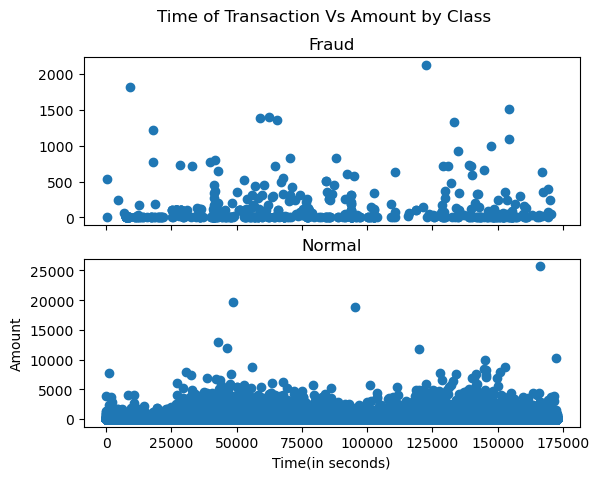

In [25]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
fig.suptitle('Time of Transaction Vs Amount by Class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time(in seconds)')
plt.ylabel('Amount')
plt.show()



In [27]:
#compare values of both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [28]:
# Undersampling
# build sample data with similar distributions for both transactions

In [29]:
normal_sample = normal.sample(n=492)

In [30]:
#concatenating two dataframes

new_df = pd.concat([normal_sample, fraud], axis=0)

In [31]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
131198,79519.0,-0.781996,0.824374,1.425970,-0.884279,0.095633,-1.516793,1.115548,-0.283490,-0.555685,...,-0.327791,-1.133028,0.126494,0.697751,-0.326407,0.450513,-0.163525,0.099665,21.93,0
125484,77687.0,-0.703088,0.540820,1.446326,1.157648,0.636225,0.479353,0.537079,-0.002876,-0.182190,...,-0.010607,0.298925,-0.035295,-0.326551,-0.172992,-0.280237,-0.257856,-0.053464,2.99,0
121380,76172.0,1.125282,-0.327252,0.146481,0.480681,-0.505466,-0.360904,-0.040623,-0.023293,-1.558074,...,-0.587903,-1.436163,0.182450,0.123499,0.175592,-0.684084,0.020938,0.026303,75.00,0
87317,61632.0,-0.581004,0.726748,0.596899,1.128858,-0.738246,-0.355068,0.727355,0.383945,-0.640338,...,0.297777,0.508811,0.367415,0.367502,-0.222092,-0.319930,-0.083591,-0.009732,154.90,0
254290,156661.0,2.015455,0.285030,-2.438140,0.601998,0.739390,-1.564130,0.840812,-0.548269,-0.039178,...,0.079468,0.355044,-0.014968,1.141055,0.357980,0.648370,-0.104976,-0.037256,42.81,0


In [32]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [33]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [34]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93896.550813,0.016552,0.002628,0.074589,0.037013,0.093586,0.023490,0.008193,-0.007418,0.014003,...,-0.019025,0.060503,-0.043123,-0.010925,0.008887,0.004275,-0.016940,-0.002756,-0.002668,80.842073
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [35]:
# spitting the data into features and target

X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [36]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
131198   79519.0 -0.781996  0.824374  1.425970 -0.884279  0.095633 -1.516793   
125484   77687.0 -0.703088  0.540820  1.446326  1.157648  0.636225  0.479353   
121380   76172.0  1.125282 -0.327252  0.146481  0.480681 -0.505466 -0.360904   
87317    61632.0 -0.581004  0.726748  0.596899  1.128858 -0.738246 -0.355068   
254290  156661.0  2.015455  0.285030 -2.438140  0.601998  0.739390 -1.564130   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [37]:
print(Y)

131198    0
125484    0
121380    0
87317     0
254290    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [38]:
# split data into training and test data

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [41]:
# Model training
# logistic regression

model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [42]:
# Model evaluation
# accuracy score

In [43]:
# accuracy on training data 

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [44]:
print('Accuracy on training data : ', training_data_accuracy )

Accuracy on training data :  0.9415501905972046


In [45]:
# accuracy on test data 

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [46]:
print('Accuracy on test data : ', test_data_accuracy )

Accuracy on test data :  0.9137055837563451


In [49]:
train_report = classification_report(Y_train, X_train_prediction)
print(train_report)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       393
           1       0.96      0.92      0.94       394

    accuracy                           0.94       787
   macro avg       0.94      0.94      0.94       787
weighted avg       0.94      0.94      0.94       787



In [50]:
test_report = classification_report(Y_test, X_test_prediction)
print(test_report)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        99
           1       0.94      0.89      0.91        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197

